# CALIDAD DE DATOS

<h1>Archivo : 6_1_internet_accesos_por_velocidad_nacional.csv</h1> 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

In [32]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\6_1_internet_accesos_por_velocidad_nacional.csv', sep=',', encoding='UTF-8')

In [33]:
# vemos la primer linea para identificar columna y datos
df.head(1)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114


In [34]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      36 non-null     int64  
 1   Trimestre                36 non-null     int64  
 2   Hasta 512 kbps           36 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   36 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  36 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  36 non-null     object 
 8   Más de 30 Mbps           36 non-null     object 
 9   OTROS                    36 non-null     float64
 10  Total                    36 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.2+ KB


<h2>Normalizacion de los datos</h2>

Normalizamos el nombre de las columnas

In [35]:
df.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')

In [36]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [37]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

Normalizamos los tipos de datos a string

In [38]:
# Definir los nuevos tipos de dato en un diccionario
nuevos_tipos = {'hasta_512_kbps': str, 'entre_512_kbps_y_1_mbps': str, 'entre_1_mbps_y_6_mbps': str, 'entre_6_mbps_y_10_mbps': str, 'entre_10_mbps_y_20_mbps': str, 'entre_20_mbps_y_30_mbps': str,'más_de_30_mbps': str , 'otros': str, 'total': str}

# Cambiar el tipo de dato de las columnas al mismo tiempo
df = df.astype(nuevos_tipos)

- Realizamos la estraccion del "."

In [39]:
# Listar las columnas en las que deseas realizar el reemplazo
columnas_a_reemplazar = ['hasta_512_kbps', 'entre_512_kbps_y_1_mbps',
       'entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps',
       'entre_10_mbps_y_20_mbps', 'entre_20_mbps_y_30_mbps', 'más_de_30_mbps',
       'otros', 'total']

# Realizar el reemplazo en todas las columnas
for columna in columnas_a_reemplazar:
    df[columna] = df[columna].str.replace('.', '')

Normalizamos los tipos de datos a int

In [40]:
# Definir los nuevos tipos de dato en un diccionario
nuevos_tipos = {'hasta_512_kbps': int, 'entre_512_kbps_y_1_mbps': int, 'entre_1_mbps_y_6_mbps': int, 'entre_6_mbps_y_10_mbps': int, 'entre_10_mbps_y_20_mbps': int, 'entre_20_mbps_y_30_mbps': int,'más_de_30_mbps': int , 'otros': int, 'total': int}

# Cambiar el tipo de dato de las columnas al mismo tiempo
df = df.astype(nuevos_tipos)

Verificamos que los valores de la columna total corresponde a la suma de las columnas de los rangos de velocidades y no existen valores erroneos

In [41]:
#creamos una columna con la suma de todos los valores excluido total
df['total1'] = df['hasta_512_kbps'] + df['entre_512_kbps_y_1_mbps']+ df['entre_1_mbps_y_6_mbps']+ df['entre_6_mbps_y_10_mbps']+ df['entre_10_mbps_y_20_mbps']+ df['entre_20_mbps_y_30_mbps'] + df['más_de_30_mbps'] + df['otros']
# creamos una columna con el valor de la diferencia entre el total del datasets y el creado para control
df['diferencia'] = df['total'] - df['total1']
#Verificamos que no existen diferencias
df['diferencia'].unique()

array([     0, 125757,  35559,  43821,  88848,  26082, 268893, 113913,
       124866, 364329,  31527,  33687])

Eliminamos la columna total por ser recurrente a la suma de todas las otras columnas<br>
El valor de los registros para la columna total presenta errores en la suma
Eliminamos tambian las columnas creadas para el analisis

In [42]:
# Eliminar las columnas innecesarias
columnas_a_eliminar = ['total', 'diferencia', 'total']
df = df.drop(columns=columnas_a_eliminar)

In [43]:
df.describe()

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,36298.138889,220559.333333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,122895.250000,8.302817e+06
std,2.618615,1.133893,44799.878520,206489.872470,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,121902.990325,1.506971e+06
min,2014.000000,1.000000,3489.000000,2898.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,14749.250000,41936.500000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,32497.000000,208301.000000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41038.000000,316865.000000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.401150e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


Verificamos la existencia de registros duplicados

In [44]:
# verificamos la existencia de registros duplicados
duplicados_df = df[df.duplicated()]
duplicados_df

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1


Verificamos la existencia de valores nulos

In [45]:
# Buscar los valores NaN en la columna 'mi_columna'
valores_nulos = df.isnull().sum()
# Contar valores nulos por columna
valores_nulos

año                        0
trimestre                  0
hasta_512_kbps             0
entre_512_kbps_y_1_mbps    0
entre_1_mbps_y_6_mbps      0
entre_6_mbps_y_10_mbps     0
entre_10_mbps_y_20_mbps    0
entre_20_mbps_y_30_mbps    0
más_de_30_mbps             0
otros                      0
total1                     0
dtype: int64

In [46]:
# Crear una nueva columna "fecha" combinando las columnas "dia", "trimestre" y "año"
df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + (df['trimestre']*3).astype(str) + '-' + '1', format='%Y-%m-%d')

<h2>Determinacion de valores outliers</h2>

<h3>Creamos las siguientes funciones para agilizar el analisis:</h3>


- ***graficar_box*** :          para hacer un grafico boxplot de las columnas indicadas<br>
- ***graficar_lin*** :          para hacer un grafico de lineas de las columnas indicadas<br>
- ***identificar_outliers***.   para realizar el calculo matematico de determinacion de valores outliers<br>
- ***reemplazar_outliers*** :   para realizar el reemplazo de/los valores aoutliers por la media de la columna


In [47]:
def graficar_box(data, columna):
    

    # Crear y mostrar boxplots solo para las columnas de interés
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data[columna], orient='h')
    plt.title('Visualización de valores atípicos')
    plt.show()
    return

In [48]:
def graficar_lin(data, columna):
    # Graficar la variable en un gráfico de barras en función del tiempo
    plt.figure(figsize=(5, 3))
    plt.plot(data['fecha'], data[columna], label= columna, marker='o', linestyle='-', color='blue')

    plt.title('Gráfico de Barras de Variable en Función del Tiempo')
    plt.xlabel('fecha')
    plt.ylabel('Velocidades de conexion')
    plt.grid(True)
    plt.legend()

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()
    return

In [49]:
def identificar_outliers(data, columna):
    """
    Identifica valores atípicos (outliers) en una columna específica de un DataFrame.

    Parameters:
        - data: DataFrame que contiene los datos.
        - columna: Nombre de la columna a verificar para outliers.

    Returns:
        - outliers: DataFrame con los valores atípicos encontrados.
    """

    # Calcular la media y la desviación estándar de la columna
    mean = data[columna].mean()
    std_dev = data[columna].std()

    # Definir un umbral (por ejemplo, 3 veces la desviación estándar)
    threshold = 2.5 * std_dev

    # Identificar valores que superen el umbral
    outliers = data[(data[columna] > (mean + threshold)) | (data[columna] < (mean - threshold))]

    return outliers

In [50]:
def reemplazar_outliers(data, columna, lista):
    # Calcular la media'
    media = df[columna].mean()
    # Buscar los valores y asignarles el valor promedio si se encuentran
    for valor in lista:
        fila_indice = data.index[data[columna] == valor].tolist()
        if fila_indice:
            data.loc[fila_indice, columna] = media
    return

Realizamos el analisis del datasets completo

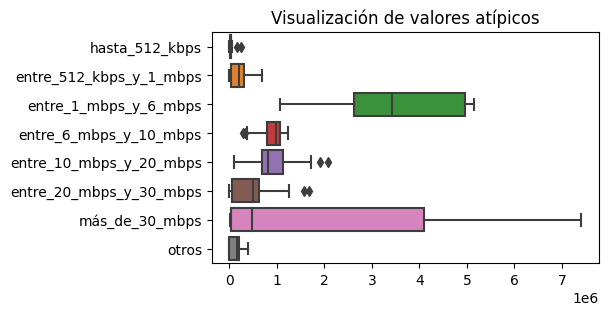

In [51]:
columnas_interesantes = ['hasta_512_kbps', 'entre_512_kbps_y_1_mbps','entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps',
       'entre_10_mbps_y_20_mbps', 'entre_20_mbps_y_30_mbps', 'más_de_30_mbps','otros']
graficar_box(df, columnas_interesantes)

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'hasta_512_kbps' </h3>

- Identificamos los valores atipicos

In [52]:
identificar_outliers(df, 'hasta_512_kbps')

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1,fecha
13,2019,3,241713,80599,3309137,1026859,806466,1141545,2314898,243467,9164684,2019-09-01
15,2019,1,166573,195706,3428759,882836,1464748,1244215,1138728,12657,8534222,2019-03-01


Realizamos el boxplot

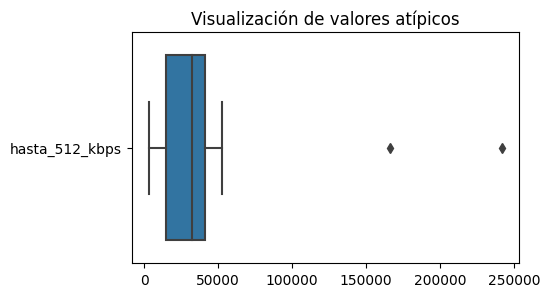

In [53]:
columnas_interesantes = ['hasta_512_kbps']
graficar_box(df, columnas_interesantes)

Realizamos el grafico de linea para analizar la secuencia de los datos

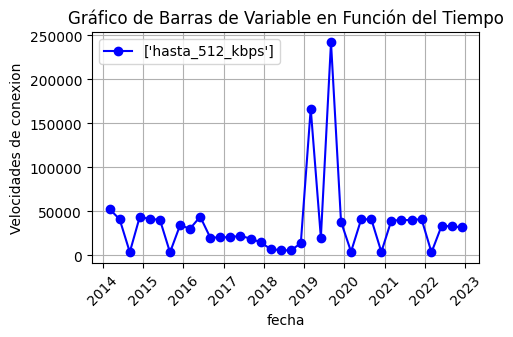

In [54]:
columnas_interesantes = ['hasta_512_kbps']
graficar_lin(df, columnas_interesantes)

Realizamos el reemplazo de los valores outliers por la media de la columna

In [55]:
outliers_a_remmplazar = [241713, 166573]
columnas_interesantes = 'hasta_512_kbps'
reemplazar_outliers(df,columnas_interesantes, outliers_a_remmplazar)

Verificamos el cambio

In [56]:
columnas_interesantes = ['hasta_512_kbps']

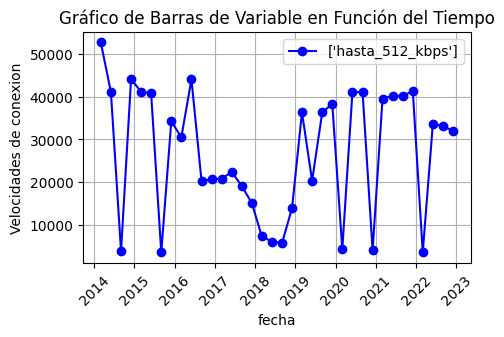

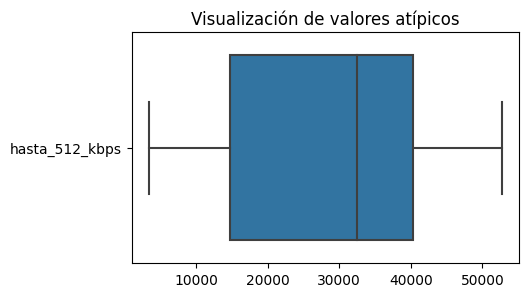

In [57]:
graficar_lin(df, columnas_interesantes)
graficar_box(df, columnas_interesantes)

In [58]:
identificar_outliers(df, 'hasta_512_kbps')

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1,fecha


<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_6_mbps_y_10_mbps' </h3>

In [59]:
identificar_outliers(df,'entre_6_mbps_y_10_mbps')

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1,fecha
35,2014,1,52684.0,687619,5130294,289182,101127,345,11595,0,6272846,2014-03-01


Graficamos

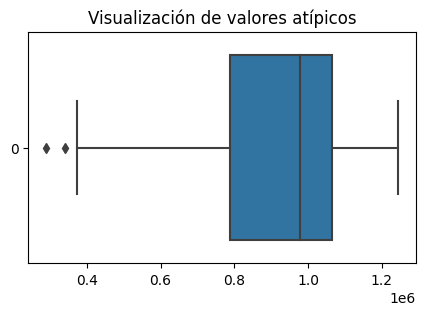

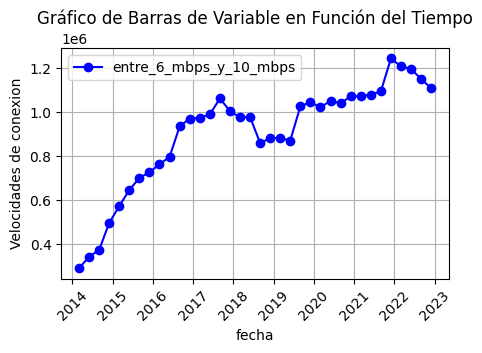

In [60]:
columnas_interesantes = 'entre_6_mbps_y_10_mbps'
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_10_mbps_y_20_mbps' </h3>

In [61]:
columnas_interesantes = 'entre_10_mbps_y_20_mbps'
identificar_outliers(df, columnas_interesantes)

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1,fecha


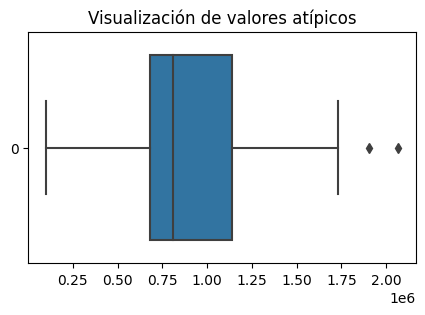

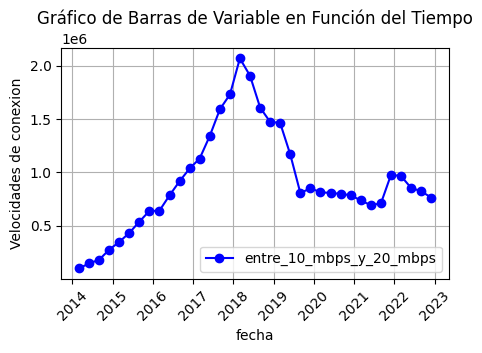

In [62]:
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_20_mbps_y_30_mbps' </h3>

In [63]:
columnas_interesantes = 'entre_20_mbps_y_30_mbps'
identificar_outliers(df, columnas_interesantes)

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1,fecha
16,2018,4,13874.0,201196,3337982,882388,1472634,1688748,599579,152388,8348789,2018-12-01


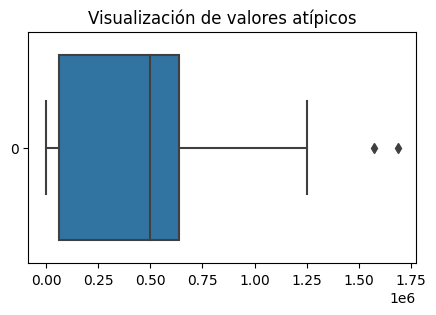

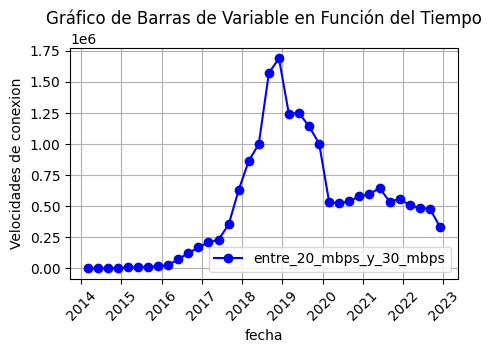

In [64]:
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h1>Realizamos un grafico comparativo de todas las variables en funcion del tiempo

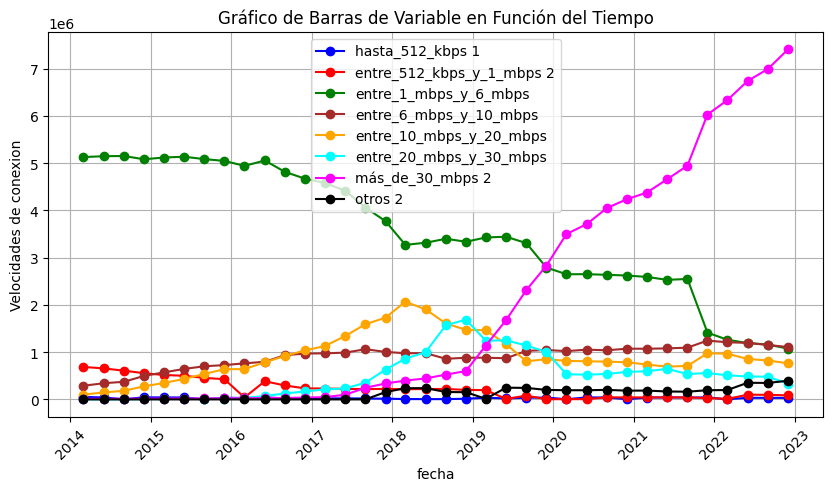

In [66]:


# Graficar la variable en un gráfico de barras en función del tiempo
plt.figure(figsize=(10, 5))
plt.plot(df['fecha'], df['hasta_512_kbps'], label='hasta_512_kbps 1', marker='o', linestyle='-', color='blue')
plt.plot(df['fecha'], df['entre_512_kbps_y_1_mbps'], label='entre_512_kbps_y_1_mbps 2', marker='o', linestyle='-', color='red')
plt.plot(df['fecha'], df['entre_1_mbps_y_6_mbps'], label='entre_1_mbps_y_6_mbps', marker='o', linestyle='-', color='green')
plt.plot(df['fecha'], df['entre_6_mbps_y_10_mbps'], label='entre_6_mbps_y_10_mbps', marker='o', linestyle='-', color='brown')
plt.plot(df['fecha'], df['entre_10_mbps_y_20_mbps'], label='entre_10_mbps_y_20_mbps', marker='o', linestyle='-', color='orange')
plt.plot(df['fecha'], df['entre_20_mbps_y_30_mbps'], label='entre_20_mbps_y_30_mbps', marker='o', linestyle='-', color='Cyan')
plt.plot(df['fecha'], df['más_de_30_mbps'], label='más_de_30_mbps 2', marker='o', linestyle='-', color='magenta')
plt.plot(df['fecha'], df['otros'], label='otros 2', marker='o', linestyle='-', color='black')

plt.title('Gráfico de Barras de Variable en Función del Tiempo')
plt.xlabel('fecha')
plt.ylabel('Velocidades de conexion')
plt.grid(True)
plt.legend()

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Grabamos el archivo csv

In [67]:
df.to_csv('../csvPi/6_1_internet_accesos_por_velocidad_nacional.csv', index=False)